# Image Classification Using CNNs

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 1. Data Exploration and Preparation


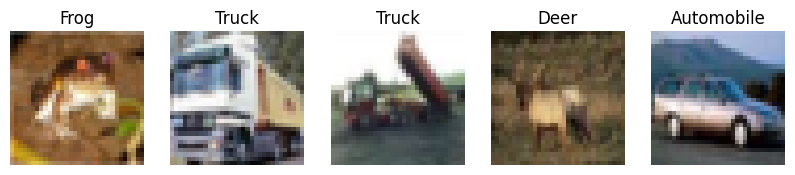

In [3]:
# Display 5 sample images with labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [5]:
# Print the dataset shape and count of unique labels
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [6]:
print("Unique labels:", len(np.unique(y_train)))

Unique labels: 10


In [7]:
# Normalize image pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Convert labels to numeric
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Display the mapping between numeric labels and class names
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck


## 2. Build and Train a CNN Model


In [10]:
# Design a simple CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


In [11]:
# Compile the model
adam_model = create_model()
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
adam_history = adam_model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)
#history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)



Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 95ms/step - accuracy: 0.2800 - loss: 1.9437 - val_accuracy: 0.4940 - val_loss: 1.4480
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.4692 - loss: 1.4758 - val_accuracy: 0.5607 - val_loss: 1.2770
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.5221 - loss: 1.3480 - val_accuracy: 0.5678 - val_loss: 1.2415
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.5521 - loss: 1.2592 - val_accuracy: 0.6074 - val_loss: 1.1207
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.5734 - loss: 1.1921 - val_accuracy: 0.6267 - val_loss: 1.0788
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.5961 - loss: 1.1405 - val_accuracy: 0.6388 - val_loss: 1.0449
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.6074 - loss: 1.1080 - val_accuracy: 0.6675 - val_loss: 0.9757
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6240 - loss: 1.0699 - 

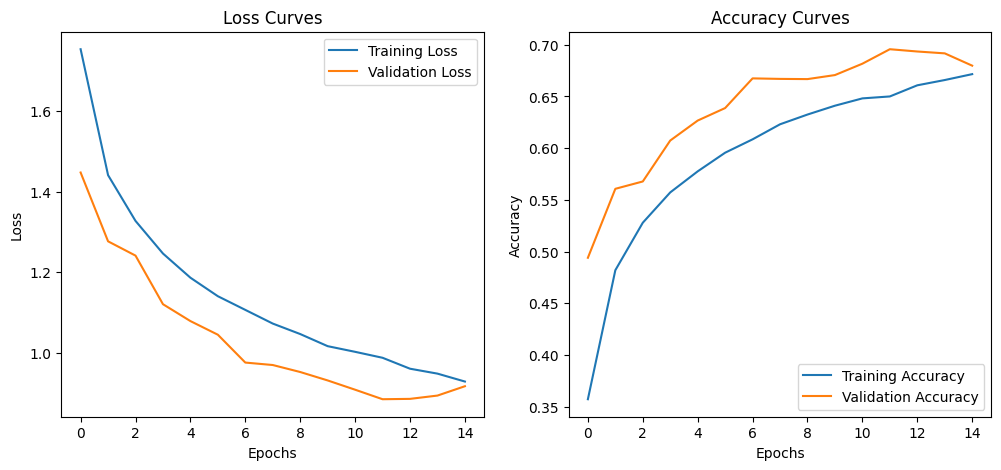

In [13]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(adam_history.history['loss'], label='Training Loss')
plt.plot(adam_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## 3. Evaluate the Model


In [14]:
# Evaluate the model on the test set
adam_loss, adam_accuracy = adam_model.evaluate(X_test, y_test)
print(f"Adam Optimizer Test Accuracy: {adam_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6811 - loss: 0.9208
Adam Optimizer Test Accuracy: 67.60%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


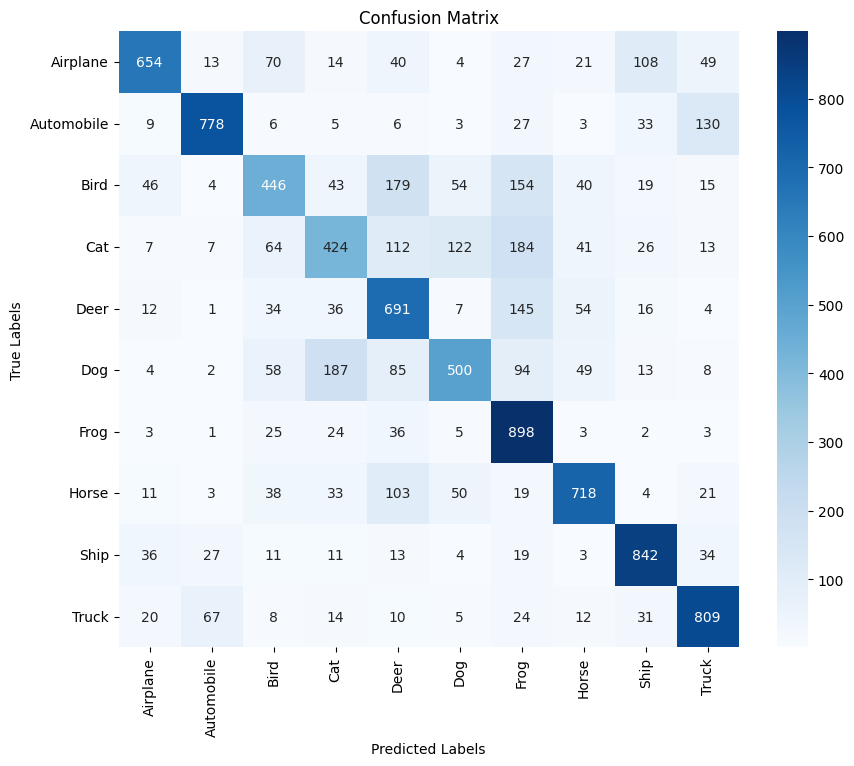

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.82      0.65      0.73      1000
  Automobile       0.86      0.78      0.82      1000
        Bird       0.59      0.45      0.51      1000
         Cat       0.54      0.42      0.47      1000
        Deer       0.54      0.69      0.61      1000
         Dog       0.66      0.50      0.57      1000
        Frog       0.56      0.90      0.69      1000
       Horse       0.76      0.72      0.74      1000
        Ship       0.77      0.84      0.80      1000
       Truck       0.74      0.81      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [15]:
# Generate confusion matrix and classification report
y_pred = adam_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

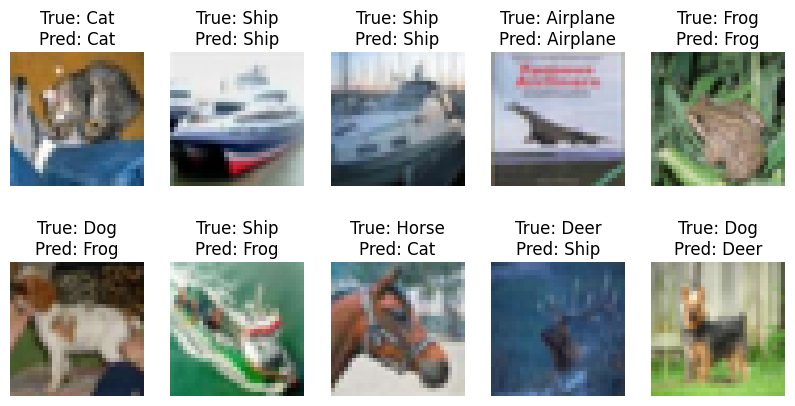

In [16]:
# Display examples of correctly and incorrectly classified images
correct = np.where(y_pred_classes == y_true)[0]
incorrect = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct[:5]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')

for i, idx in enumerate(incorrect[:5]):
    plt.subplot(2, 5, i+6)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.show()

## 4. Experimentation with Model Improvements


In [17]:
# Experiment with SGD optimizers
sgd_model = create_model()
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
sgd_history = sgd_model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.1360 - loss: 2.2669 - val_accuracy: 0.2504 - val_loss: 2.0648
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.2279 - loss: 2.0644 - val_accuracy: 0.3056 - val_loss: 1.9487
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.2828 - loss: 1.9604 - val_accuracy: 0.3581 - val_loss: 1.8160
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.3233 - loss: 1.8484 - val_accuracy: 0.3744 - val_loss: 1.7538
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.3590 - loss: 1.7617 - val_accuracy: 0.4238 - val_loss: 1.6201
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.3818 - loss: 1.6893 - val_accuracy: 0.4477 - val_loss: 1.5647
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.4035 - loss: 1.6366 - val_accuracy: 0.4600 - val_loss: 1.5221
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.4202 - loss: 1.5945 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


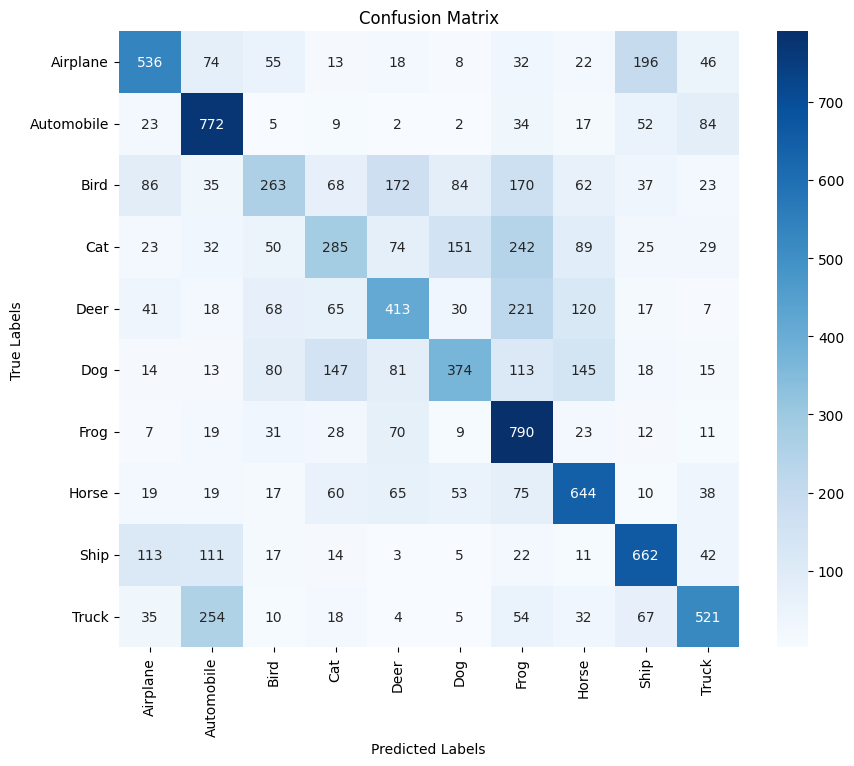

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.60      0.54      0.57      1000
  Automobile       0.57      0.77      0.66      1000
        Bird       0.44      0.26      0.33      1000
         Cat       0.40      0.28      0.33      1000
        Deer       0.46      0.41      0.43      1000
         Dog       0.52      0.37      0.43      1000
        Frog       0.45      0.79      0.57      1000
       Horse       0.55      0.64      0.59      1000
        Ship       0.60      0.66      0.63      1000
       Truck       0.64      0.52      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.51     10000
weighted avg       0.52      0.53      0.51     10000



In [26]:
# Generate confusion matrix and classification report for SGD Optimizer
y_pred_sgd = sgd_model.predict(X_test)
y_pred_sgd_classes = np.argmax(y_pred_sgd, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_sgd_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_sgd_classes, target_names=class_names))

In [18]:
# Experiment with RMSprop optimizers
rmsprop_model = create_model()
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_history = rmsprop_model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 107ms/step - accuracy: 0.2677 - loss: 1.9848 - val_accuracy: 0.4781 - val_loss: 1.4649
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.4585 - loss: 1.5166 - val_accuracy: 0.5444 - val_loss: 1.2882
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.5225 - loss: 1.3505 - val_accuracy: 0.5905 - val_loss: 1.1742
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5550 - loss: 1.2600 - val_accuracy: 0.5997 - val_loss: 1.1371
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.5838 - loss: 1.1843 - val_accuracy: 0.6419 - val_loss: 1.0416
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6001 - loss: 1.1389 - val_accuracy: 0.6495 - val_loss: 1.0197
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6155 - loss: 1.1023 - val_accuracy: 0.6450 - val_loss: 1.0592
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6312 - loss: 1.0554 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


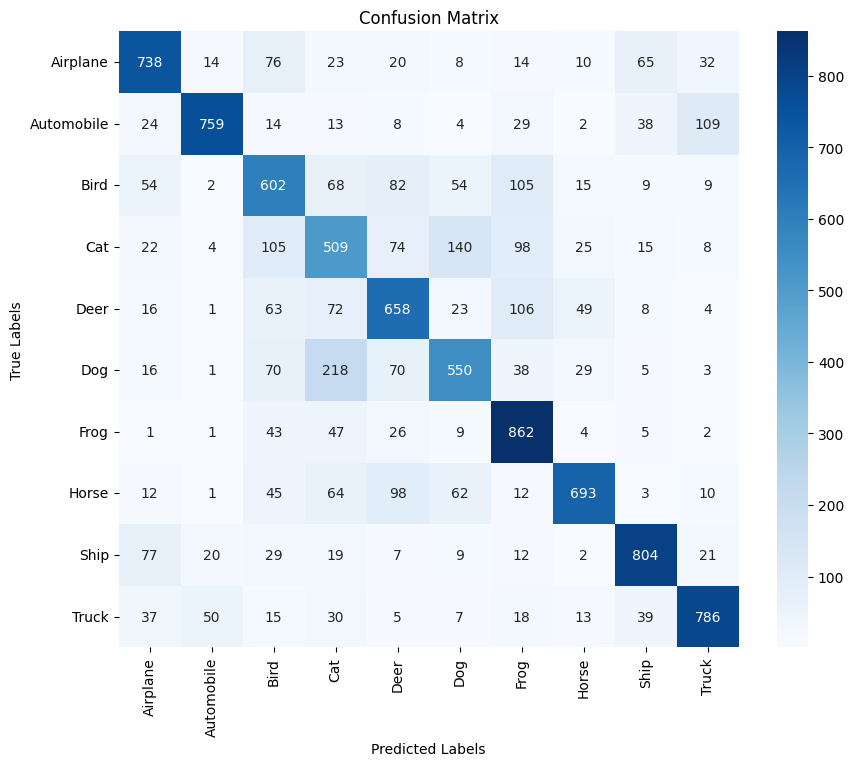

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.74      0.74      0.74      1000
  Automobile       0.89      0.76      0.82      1000
        Bird       0.57      0.60      0.58      1000
         Cat       0.48      0.51      0.49      1000
        Deer       0.63      0.66      0.64      1000
         Dog       0.64      0.55      0.59      1000
        Frog       0.67      0.86      0.75      1000
       Horse       0.82      0.69      0.75      1000
        Ship       0.81      0.80      0.81      1000
       Truck       0.80      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [19]:
# Generate confusion matrix and classification report for RMSProp Optimizer
y_pred_rmsprop = rmsprop_model.predict(X_test)
y_pred_rmsprop_classes = np.argmax(y_pred_rmsprop, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_rmsprop_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_rmsprop_classes, target_names=class_names))

In [25]:
# Compare performance
# Compare performance
print("Performance Comparison:")
adam_loss, adam_accuracy = adam_model.evaluate(X_test, y_test)
print(f"Adam Optimizer Test Accuracy: {adam_accuracy * 100:.2f}%")
#print(f"Adam Optimizer Test Accuracy:", {adam_accuracy * 100:.2f%}) #{adam_accuracy * 100:.2f}%
sgd_loss, sgd_accuracy = sgd_model.evaluate(X_test, y_test)
print(f"SGD Optimizer Test Accuracy: {sgd_accuracy * 100:.2f}%")
rmsprop_loss, rmsprop_accuracy = rmsprop_model.evaluate(X_test, y_test)
print(f"RMSprop Optimizer Test Accuracy:, {rmsprop_accuracy * 100:.2f}%")

Performance Comparison:
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6811 - loss: 0.9208
Adam Optimizer Test Accuracy: 67.60%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5295 - loss: 1.3278
SGD Optimizer Test Accuracy: 52.60%
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6978 - loss: 0.9135
RMSprop Optimizer Test Accuracy:, 69.61%


### Insights:


1.   Input data is loaded and preprocessed (normalizing the pixel, converting label to numeric, etc)
2.   CNN model is desined with 32 input layers which matches the dimention of image and RelU activation function. Pooling layer and dropout layer are also added to reduce the spatial dimension and prevent overfitting.
3. The flatten layer flattens the 2D feature maps into a 1D vector and then final dense layer (output) is added with the softmax activation function that gives the output of the network.
4. Model is trained with different optimizer (adam, sgd, rmsprop) with 15 epochs and performance is compared for these optimizers.
5. The model with RMSProp optimizer outperforms the other two optimizers with an accuracy of 69.61%.
6. There is a variability in predicting the classes. The class "automobile" and "ship" have the highest f1-score whereas "bird" and "cat" has the lowest f1-score. This indicated class with highest f1-scores are moslty classified correctly while there are more misclassification in classed with the lowest f1-score.

